In [201]:
import requests
import time
from datetime import datetime,timedelta
import pandas as pd
from pandasql import sqldf
import  matplotlib.pyplot as plt

In [202]:
pysql = lambda q : sqldf(q,globals())


In [203]:
# auth = Auth('prepareforairbnb@163.com','ppnn13%leetcode')
cookies='__cfduid=d55f842b1214ffbe3252b8d510ceee0cd1570705644; csrftoken=GdRqyCLHli8mv1ZhJF5d8DFBWaMeq9BbqJsqNbTCQ0Gttp3R9PEFfEqV7ArupZIj; _ga=GA1.2.1521596719.1570705650; __atuvc=9%7C49%2C0%7C50%2C11%7C51%2C6%7C52%2C13%7C1; __stripe_mid=c3e7443c-855c-4063-8858-c4d58a43b8b1; _gid=GA1.2.1389917660.1577941802; c_a_u="cHJlcGFyZWZvcmFpcmJuYg==:1inPkd:h2ipLeQio-LXipzykKKrJKUomtI"; LEETCODE_SESSION=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJfYXV0aF91c2VyX2lkIjoiMTc1ODU0NyIsIl9hdXRoX3VzZXJfYmFja2VuZCI6ImFsbGF1dGguYWNjb3VudC5hdXRoX2JhY2tlbmRzLkF1dGhlbnRpY2F0aW9uQmFja2VuZCIsIl9hdXRoX3VzZXJfaGFzaCI6Ijk0YjdlZGUwNDlhN2ExZjE1ODZlNDJkOWQ1NjgzYjk0ZDViODMxYWQiLCJpZCI6MTc1ODU0NywiZW1haWwiOiJwcmVwYXJlZm9yYWlyYm5iQDE2My5jb20iLCJ1c2VybmFtZSI6InByZXBhcmVmb3JhaXJibmIiLCJ1c2VyX3NsdWciOiJwcmVwYXJlZm9yYWlyYm5iIiwiYXZhdGFyIjoiaHR0cHM6Ly9hc3NldHMubGVldGNvZGUuY29tL3VzZXJzL3ByZXBhcmVmb3JhaXJibmIvYXZhdGFyXzE1NzQ3NTc4NjAucG5nIiwidGltZXN0YW1wIjoiMjAyMC0wMS0wMyAxNjo1OToxMS4zOTIyMjYrMDA6MDAiLCJJUCI6IjEzOS4xODAuMTk4LjIwIiwiSURFTlRJVFkiOiI3ODhlNTVmM2E0NWQyZTI2NWYxZjdjODFkYTE1YzkzMSIsIl9zZXNzaW9uX2V4cGlyeSI6MTIwOTYwMH0.Lc-21_PSppiQGl_TTVE5PWMhm4LIjbsYy9cJb1F54eE'

In [204]:
headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Encoding': 'gzip, deflate',
    'Accept-Language': 'en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7,zh-TW;q=0.6',
    'Host': 'leetcode.com',
    'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Mobile Safari/537.36',
    'Referer': 'https://leetcode.com/accounts/login/',
    'Cookie':cookies
}
url = 'https://leetcode.com/api/submissions/?offset={}&limit=20'

In [82]:
items = []
page = 0
while True:
    r = requests.get(url.format(page),headers=headers)
    print(url.format(page),r.status_code)
    if r.status_code != 200:
        time.sleep(5)
        continue
    js = json.loads(r.text)
    items.extend(js['submissions_dump'])
    page = page +20
    if not js['has_next']:
        break
    time.sleep(1)

https://leetcode.com/api/submissions/?offset=0&limit=20 200
https://leetcode.com/api/submissions/?offset=20&limit=20 200
https://leetcode.com/api/submissions/?offset=40&limit=20 200
https://leetcode.com/api/submissions/?offset=60&limit=20 200
https://leetcode.com/api/submissions/?offset=80&limit=20 200
https://leetcode.com/api/submissions/?offset=100&limit=20 200
https://leetcode.com/api/submissions/?offset=120&limit=20 200
https://leetcode.com/api/submissions/?offset=140&limit=20 200
https://leetcode.com/api/submissions/?offset=160&limit=20 200
https://leetcode.com/api/submissions/?offset=180&limit=20 200
https://leetcode.com/api/submissions/?offset=200&limit=20 200
https://leetcode.com/api/submissions/?offset=220&limit=20 200
https://leetcode.com/api/submissions/?offset=240&limit=20 200
https://leetcode.com/api/submissions/?offset=260&limit=20 200
https://leetcode.com/api/submissions/?offset=280&limit=20 200
https://leetcode.com/api/submissions/?offset=300&limit=20 200
https://leetco

In [83]:
with open('submissions.txt','w') as fout:
    fout.write(json.dumps(items))

In [198]:
def plotItems(its):
    dt = pd.DataFrame(items)
    dt = dt.loc[dt['status_display'] == 'Accepted',]
    dt['date'] = dt['timestamp'].apply(lambda x : datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
    min_date = datetime.utcfromtimestamp(dt['timestamp'].min())
    max_date = datetime.utcfromtimestamp(dt['timestamp'].max())
    times = []
    while min_date < max_date:
        times.append(min_date.strftime('%Y-%m-%d'))
        min_date = min_date + timedelta(days=1)
    dtime = pd.DataFrame({'date':times})
#     dtime.head(2)
    dt.drop_duplicates('title',inplace=True)
    dt1 = pysql('''select A.date as date,nums from 
                dtime as A left join
                (select date,count(*) as nums from dt group by date order by date asc) B
                on A.date = B.date
                ''')
    dt1.fillna(0,inplace=True)
    dt1['label'] = dt1['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
    plt.figure(figsize=(18, 6))
    dt1.nums.cumsum()
    plt.locator_params(nbins=10)
    plt.plot(dt1.label,dt1.nums.cumsum(),color=(1.0,0.2,0.3),label='_nolegend_')
    plt.title('Submissions')
    plt.show()

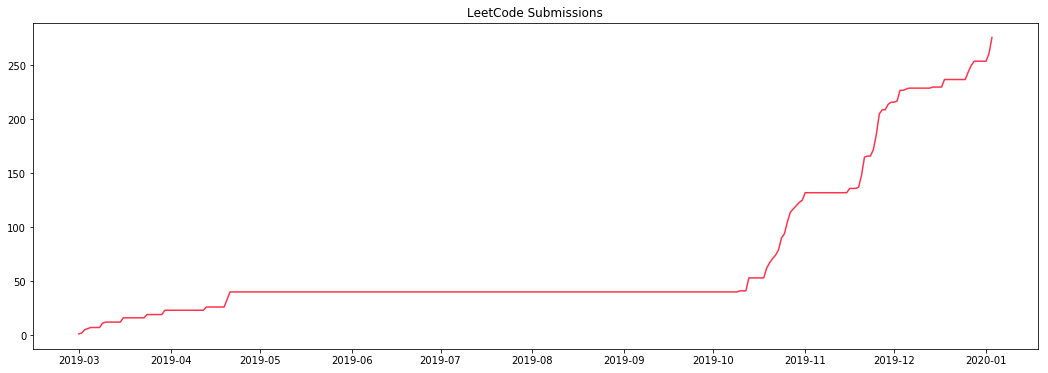

In [199]:
plotItems(items)